In [1]:
#Importing the packages
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

C:\Users\Tanaji\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Reading data using pandas dataframe


df = pd.read_csv("C:/Users/Varsha/.jupyter/DataSetReviews.csv")

In [3]:
#checking for the columns
df.columns
#checking for the the title and values
df.head(10)
#Checking for the total count
df.shape
df.head(4)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427


In [5]:
best_ratings = df[['id','manufacturerNumber','reviews.rating']]
#number of rows in dataframe  which are the total number of ratings
total_num_of_ratings = len(best_ratings)
print ("total number of user-items ratings is: %d" % total_num_of_ratings)

#number of unique reviewers
num_of_users = len(best_ratings['id'].unique())
print ("number of unique reviewers is: %d" % num_of_users)

#number of unique items
num_of_items = len(best_ratings['manufacturerNumber'].unique())
print( "number of unique items is: %d" % num_of_items)


total number of user-items ratings is: 71044
number of unique reviewers is: 600
number of unique items is: 584


In [6]:
#average rating and standar deviation
ratings_mean =best_ratings['reviews.rating'].mean()
ratings_std = best_ratings['reviews.rating'].std()
print( "average rating is %.3f and standard deviation %.3f" % (ratings_mean,ratings_std))



average rating is 4.386 and standard deviation 1.068


In [7]:

# The sparsity of the user-item matrix
sparsity = float(total_num_of_ratings) / (num_of_users * num_of_items)
print ("sparisity of the user-item matrix is %.8f" % sparsity)


sparisity of the user-item matrix is 0.20275114


In [8]:
users_df = best_ratings.groupby('id').size()

print( "The minimum number of items rated by a user is %d" % min(users_df))
print ("The maximum number of items rated by a user is %d" % max(users_df))

The minimum number of items rated by a user is 1
The maximum number of items rated by a user is 8606


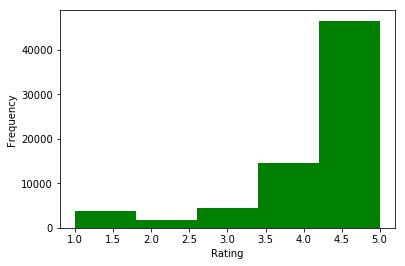

In [9]:
# frequency of each rating in a histogram
plt.figure(1)
plt.hist(best_ratings['reviews.rating'].dropna(),5, facecolor='g')

plt.xlabel('Rating')
plt.ylabel('Frequency')
#plt.axis([0, 5, 0, 18000])
plt.show()

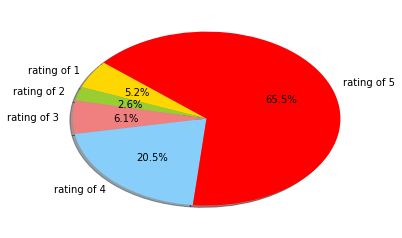

In [10]:
# percentage of each rating in a pie chart
plt.figure(2)
labels = 'rating of 1', 'rating of 2' ,'rating of 3', 'rating of 4','rating of 5'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.pie(best_ratings.groupby('reviews.rating').size(),labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')

plt.show()



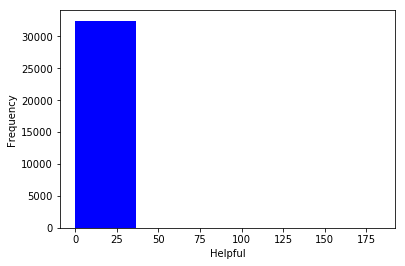

In [11]:
# frequency of each rating in a histogram
plt.figure(1)
plt.hist(df['reviews.numHelpful'].dropna(),5, facecolor='b')

plt.xlabel('Helpful')
plt.ylabel('Frequency')
#plt.axis([0, 5, 0, 18000])
plt.show()


In [12]:
df1 = pd.DataFrame(df, columns = ['reviews.title', 'reviews.rating','reviews.text'])




In [13]:
#Splitting the data
#If the rating is greater than 3 the sentiment is positive
#If rating is lesser than 3 the sentiment is negative
#Excluding rating 3


def mask_with_values(df1):
    mask = df1['reviews.rating']!= 3
    return df1[mask]

df2 =pd.DataFrame(mask_with_values(df1))

#reviews = mask_with_values(df1)

def partition(x):
    if x < 3:
     return 'negative'
    return 'positive'

df2['reviews.rating'] = df2['reviews.rating'].map(partition)
df2['reviews.title'] = df2['reviews.title']
df2['reviews.text']  = df2['reviews.text']


In [14]:
df3=pd.DataFrame(df2 , columns= ['reviews.rating','reviews.title', 'reviews.text'])


df3 = df3.dropna()
print(df3.head(20))
Score = df3['reviews.rating']


   reviews.rating                reviews.title  \
0        positive                 Just Awesome   
1        positive                         Good   
2        positive                         Good   
3        negative                 Disappointed   
4        negative                   Irritation   
5        negative                 Not worth it   
6        negative                Disappointing   
7        negative             Not happy at all   
8        negative           Very disappointing   
9        negative                    Don't buy   
10       negative          pretty dissapoitned   
11       negative               Waste of Money   
12       negative               waste of money   
13       negative  Not happy with this product   
14       negative                 Disappointed   
15       negative          Not what I expected   
16       negative        Was so disappointed!!   
17       negative           very disappointed!   
20       positive                  We love it!   


In [16]:
#plt.figure(2)
#labels = 'rating negative', 'rating positive'
#colors = ['yellowgreen', 'lightskyblue']
#plt.pie(df2.groupby('reviews.rating').size(),labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')

#plt.show()


In [17]:
#Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(df3['reviews.title'], df3['reviews.rating'],test_size=0.25, random_state=42)




In [18]:
#Creating an instance of the PortStemmer class
# Stemmer the instance created
#Stem is the function used
#Tokenization performed before stemming
stemmer = PorterStemmer()
from nltk.corpus import stopwords

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)


In [19]:
#--- Training set
#For every text in the X_train , read using loop
#Convert text to lower
#Translate text, replace all punctuation with space
#Create and instance of CountVectorizer class
#Use the CountVectorization to generate Vocabulary and vector, with the fit and transform function
#Use the tfidf transformer to generate the term frequency and inverse document frequency

corpus = []
for text in X_train:
   text = text.lower()
   text = text.translate(trantab)
   text=tokenize(text)
   corpus.append(text)
        
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
        
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [20]:
#--- Test set
#Repeat similar procedure as in train data

test_set = []
for text in X_test:
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

X_new_counts = count_vect.transform(test_set)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


df3 = pd.DataFrame({'Before': X_train, 'After': corpus})
print(df3.head(5))

prediction = dict()


                                   After                             Before
41470           great movi if your a fan          great movie if your a fan
34830                               movi                              Movie
3084                        hilari funni                 Hilariously Funny!
56635  not as good as the swifer sweeper  Not as good as the Swifer Sweeper
55461                         great film                         Great film


In [21]:
#Applying the Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)
print("accuaracy of model")
accuracy_score(y_test, prediction['Multinomial'])

accuaracy of model


0.94655474364393988

In [22]:
#Applying the Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)
print("accuaracy of model")
accuracy_score(y_test, prediction['Bernoulli'])

accuaracy of model


0.94130080318859832

In [23]:
#Applying the logistic Regression model

from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)
print("accuaracy of model")
accuracy_score(y_test, prediction['Logistic'])

accuaracy of model


0.95283531614227912

In [24]:
#Applying the support vector classifier Naive Bayes model

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC
model =LinearSVC().fit(X_train_tfidf, y_train)
prediction['svc']= model.predict(X_test_tfidf)
print("accuaracy of model")
accuracy_score(y_test, prediction['svc'])



accuaracy of model


0.95670028383356487

In [25]:
#Applying the Decision Trtee Classifier model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
prediction['DecisionTree'] = model.predict(X_test_tfidf)
print("accuaracy of model")
accuracy_score(y_test, prediction['DecisionTree'])


accuaracy of model


0.95621716287215408

In [26]:
from sklearn.metrics import accuracy_score
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
for model, predicted in prediction.items():
    accuracy = accuracy_score(y_test.map(formatt), vfunc(predicted))
    accuracy
    print(accuracy)
    cmp += 1
    
    

0.946554743644
0.941300803189
0.952835316142
0.956700283834
0.956217162872


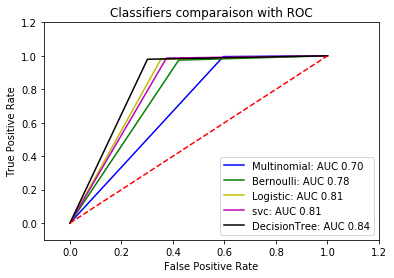

In [27]:
#Plotting the ROC - Area Under the Curve for all the models

def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

             precision    recall  f1-score   support

   positive       0.75      0.65      0.69      1369
   negative       0.97      0.98      0.97     15190

avg / total       0.95      0.95      0.95     16559



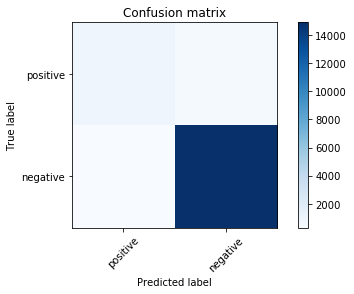

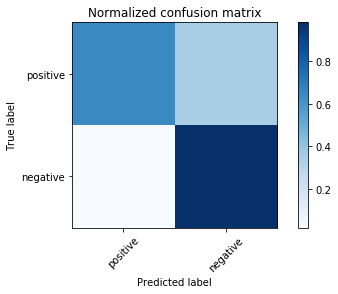

In [28]:
#Confusion Matrix for Logistic Regression Model

print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

             precision    recall  f1-score   support

   positive       0.67      0.58      0.62      1369
   negative       0.96      0.97      0.97     15190

avg / total       0.94      0.94      0.94     16559



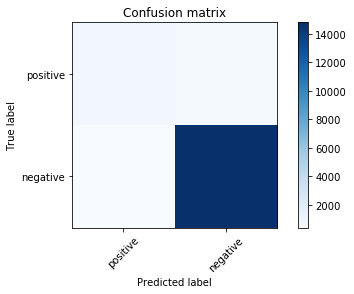

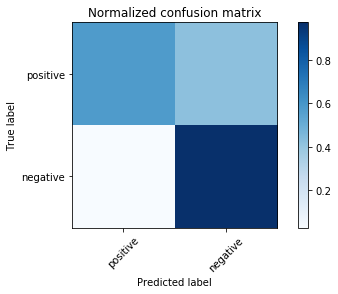

In [29]:
#Confusion Matrix for Bernoulli Model


print(metrics.classification_report(y_test, prediction['Bernoulli'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

cm = confusion_matrix(y_test, prediction['Bernoulli'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
         

             precision    recall  f1-score   support

   positive       0.89      0.40      0.56      1369
   negative       0.95      1.00      0.97     15190

avg / total       0.94      0.95      0.94     16559



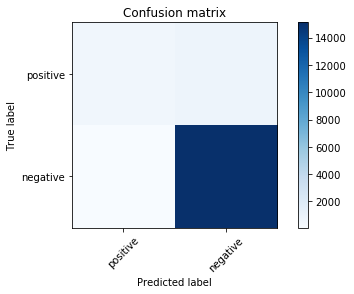

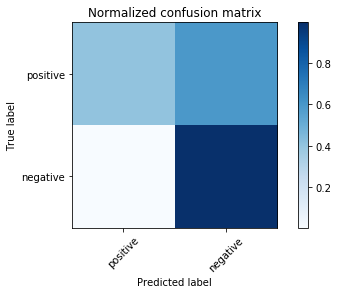

             precision    recall  f1-score   support

   positive       0.81      0.63      0.70      1369
   negative       0.97      0.99      0.98     15190

avg / total       0.95      0.96      0.95     16559



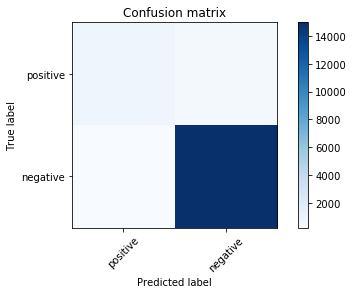

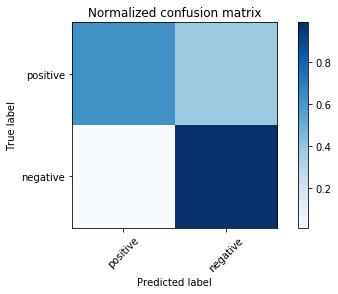

In [30]:
#Confusion Matrix for Multinomial Model

print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

cm = confusion_matrix(y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()



             precision    recall  f1-score   support

   positive       0.83      0.65      0.72       541
   negative       0.97      0.99      0.98      6083

avg / total       0.96      0.96      0.96      6624



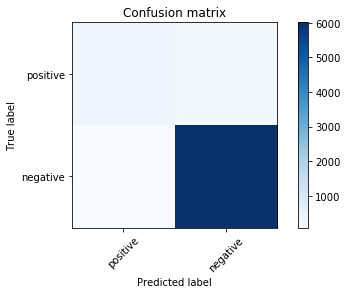

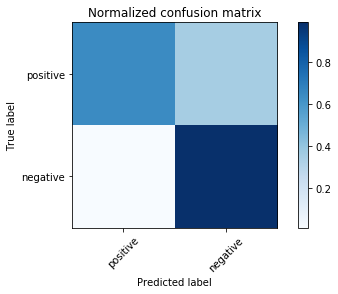

In [68]:

#Confusion Matrix for SVC Model
print(metrics.classification_report(y_test, prediction['svc'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

cm = confusion_matrix(y_test, prediction['svc'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
         

             precision    recall  f1-score   support

   positive       0.62      0.59      0.61       541
   negative       0.96      0.97      0.97      6083

avg / total       0.94      0.94      0.94      6624



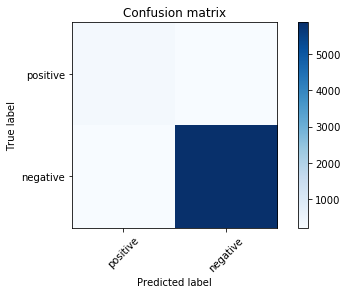

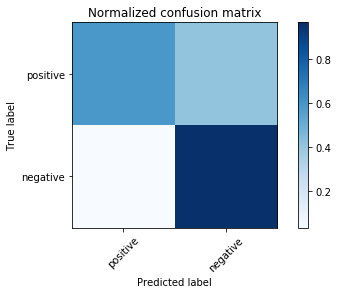

In [70]:

#Confusion Matrix for Decision Tree Model
print(metrics.classification_report(y_test, prediction['DecisionTree'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

cm = confusion_matrix(y_test, prediction['DecisionTree'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
         

In [71]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df.groupby("reviews.rating")["reviews.title"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["reviews.titleClean"] = cluster1["reviews.title"].apply(cleanReviews)


In [72]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    


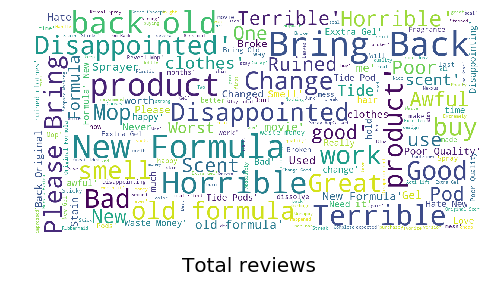

In [73]:

show_wordcloud(cluster["reviews.title"][1], title = "Total reviews")

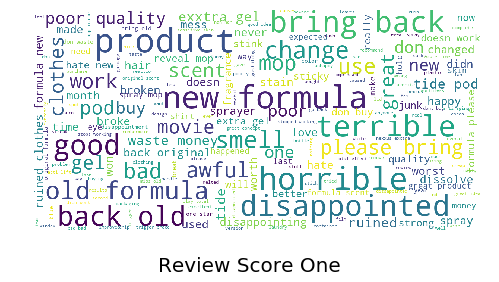

In [74]:
show_wordcloud(cluster1["reviews.titleClean"][0], title = "Review Score One")

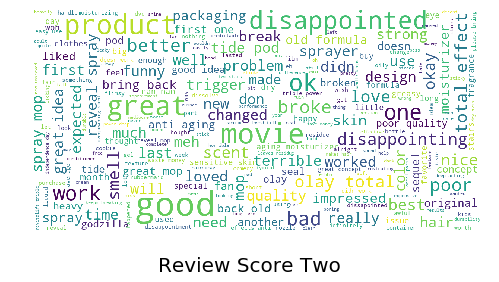

In [75]:
show_wordcloud(cluster1["reviews.titleClean"][1], title = "Review Score Two")

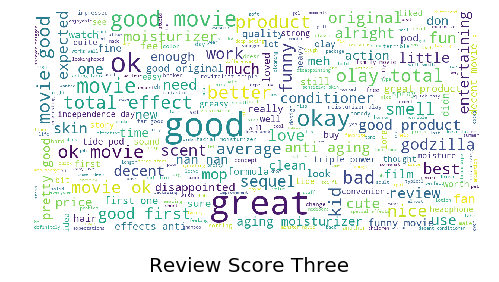

In [76]:
 
show_wordcloud(cluster1["reviews.titleClean"][2], title = "Review Score Three")


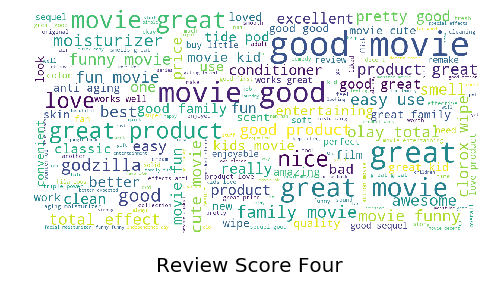

In [77]:

show_wordcloud(cluster1["reviews.titleClean"][3], title = "Review Score Four")

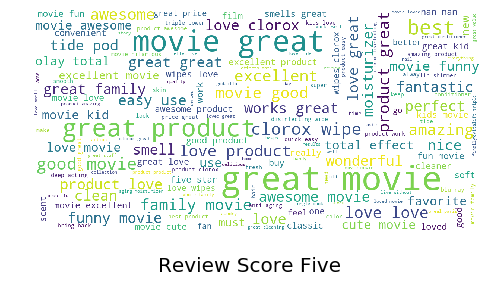

In [78]:
show_wordcloud(cluster1["reviews.titleClean"][4], title = "Review Score Five")
          

In [79]:

df3=pd.DataFrame(df2 , columns= ['reviews.rating','reviews.title', 'reviews.text'])


df3 = df3.dropna()
print(df3.head(20))
Score = df3['reviews.rating']



#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df3.groupby("reviews.rating")["reviews.title"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["reviews.titleClean"] = cluster1["reviews.title"].apply(cleanReviews)



   reviews.rating                reviews.title  \
0        positive                 Just Awesome   
1        positive                         Good   
2        positive                         Good   
3        negative                 Disappointed   
4        negative                   Irritation   
5        negative                 Not worth it   
6        negative                Disappointing   
7        negative             Not happy at all   
8        negative           Very disappointing   
9        negative                    Don't buy   
10       negative          pretty dissapoitned   
11       negative               Waste of Money   
12       negative               waste of money   
13       negative  Not happy with this product   
14       negative                 Disappointed   
15       negative          Not what I expected   
16       negative        Was so disappointed!!   
17       negative           very disappointed!   
20       positive                  We love it!   


In [80]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    


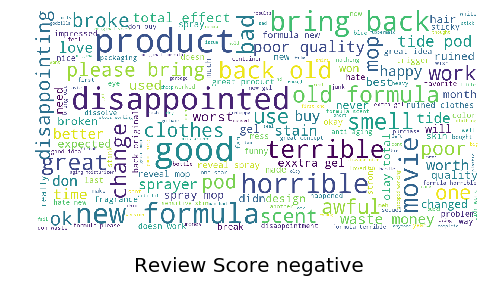

In [81]:

    
show_wordcloud(cluster1["reviews.titleClean"][0], title = "Review Score negative")

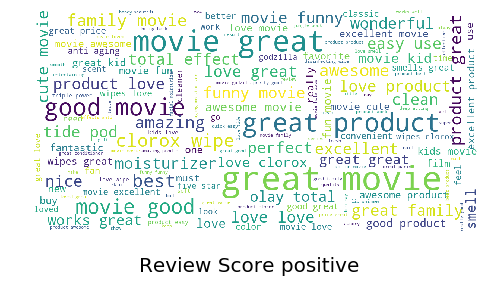

In [82]:
    
show_wordcloud(cluster1["reviews.titleClean"][1], title = "Review Score positive")

In [83]:
df = pd.read_csv("C:/Users/Tanaji/.jupyter/DataSetReviews.csv")


In [84]:
df5 = pd.DataFrame(df, columns = ['reviews.title', 'reviews.rating','reviews.text'])



def mask_with_values(df1):
    mask = df1['reviews.rating']!= 3
    return df1[mask]

df6 =pd.DataFrame(mask_with_values(df5))

#reviews = mask_with_values(df5)

def partition(x):
    if x < 3:
     return 'negative'
    return 'positive'


df6['reviews.rating'] = df6['reviews.rating'].map(partition)
df6['reviews.title'] = df6['reviews.title']
df6['reviews.text']  = df6['reviews.text']



In [85]:
df7=pd.DataFrame(df6, columns= ['reviews.rating','reviews.title', 'reviews.text'])


df7 = df7.dropna()
print(df7.head(20))
Score = df7['reviews.rating']

   reviews.rating                reviews.title  \
0        positive                 Just Awesome   
1        positive                         Good   
2        positive                         Good   
3        negative                 Disappointed   
4        negative                   Irritation   
5        negative                 Not worth it   
6        negative                Disappointing   
7        negative             Not happy at all   
8        negative           Very disappointing   
9        negative                    Don't buy   
10       negative          pretty dissapoitned   
11       negative               Waste of Money   
12       negative               waste of money   
13       negative  Not happy with this product   
14       negative                 Disappointed   
15       negative          Not what I expected   
16       negative        Was so disappointed!!   
17       negative           very disappointed!   
20       positive                  We love it!   


In [86]:
X_train, X_test, y_train, y_test = train_test_split(df7['reviews.text'], df7['reviews.rating'],test_size=0.1, random_state=42)


In [87]:
stemmer = PorterStemmer()
from nltk.corpus import stopwords

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)


In [88]:
#--- Training set

corpus = []
for text in X_train:
   text = text.lower()
   text = text.translate(trantab)
   text=tokenize(text)
   corpus.append(text)
        
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
        
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [89]:
#--- Test set

test_set = []
for text in X_test:
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

X_new_counts = count_vect.transform(test_set)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


df7 = pd.DataFrame({'Before': X_train, 'After': corpus})
print(df7.head(5))

prediction = dict()


                                                   After  \
23217  got it becaus it wa 3dother wise would have go...   
64023  doe follow tightli with origin yet appeal to t...   
9561   i love use clorox becaus i know that when i fi...   
38063  i tri the tide pod 4 in 1 and love it it s so ...   
59606  i am shock at how much better my skin look and...   

                                                  Before  
23217  Got it because it was 3DOther wise would have ...  
64023  does follow tightly with original yet appealin...  
9561   I love using Clorox because I know that when I...  
38063  I tried the Tide Pods 4 in 1 and loved it. It'...  
59606  I am shocked at how much better my skin looks ...  


In [90]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)
accuracy_score(y_test,prediction['Multinomial'])

0.93040458937198067

In [91]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)
accuracy_score(y_test, prediction['Bernoulli'])

0.87137681159420288

In [92]:

from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)
accuracy_score(y_test, prediction['Logistic'])

0.94233091787439616

In [93]:

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC
model =LinearSVC().fit(X_train_tfidf, y_train)
prediction['svc']= model.predict(X_test_tfidf)
accuracy_score(y_test, prediction['svc'])

0.95999396135265702

In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
prediction['DecisionTree'] = model.predict(X_test_tfidf)
accuracy_score(y_test, prediction['DecisionTree'])



0.9371980676328503

In [95]:
from sklearn.metrics import accuracy_score
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
for model, predicted in prediction.items():
    accuracy = accuracy_score(y_test.map(formatt), vfunc(predicted))
    accuracy
    print(accuracy)
    cmp += 1
    
    

0.930404589372
0.871376811594
0.942330917874
0.959993961353
0.937198067633


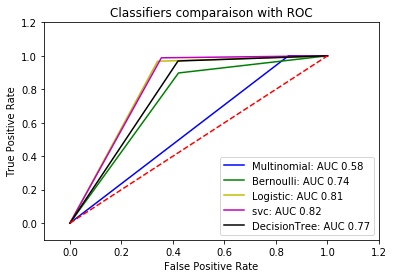

In [96]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

             precision    recall  f1-score   support

   positive       0.64      0.66      0.65       541
   negative       0.97      0.97      0.97      6083

avg / total       0.94      0.94      0.94      6624



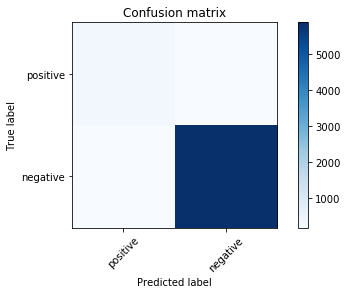

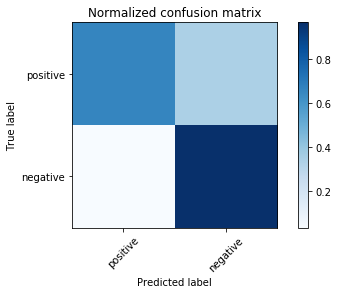

In [97]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
         

             precision    recall  f1-score   support

   positive       0.33      0.58      0.42       541
   negative       0.96      0.90      0.93      6083

avg / total       0.91      0.87      0.89      6624



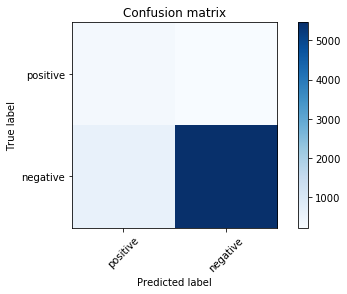

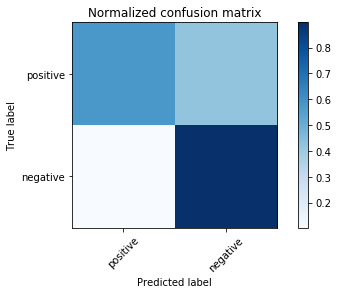

In [98]:
print(metrics.classification_report(y_test, prediction['Bernoulli'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Bernoulli'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
         

             precision    recall  f1-score   support

   positive       0.98      0.15      0.26       541
   negative       0.93      1.00      0.96      6083

avg / total       0.93      0.93      0.91      6624



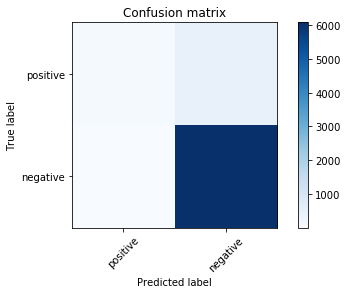

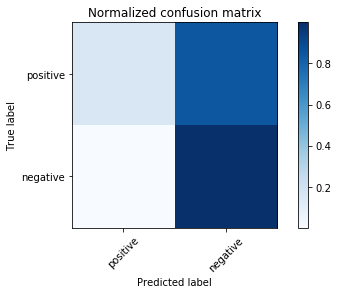

In [99]:
print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
         

             precision    recall  f1-score   support

   positive       0.62      0.58      0.60       541
   negative       0.96      0.97      0.97      6083

avg / total       0.94      0.94      0.94      6624



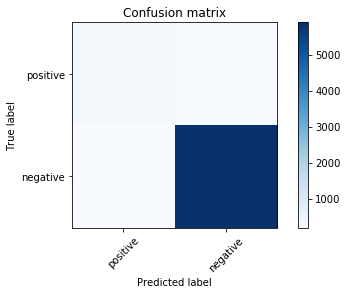

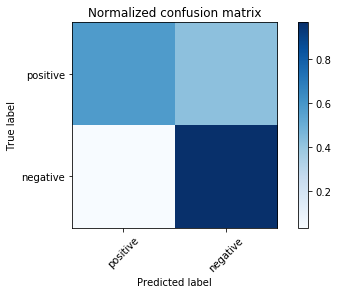

In [100]:
print(metrics.classification_report(y_test, prediction['DecisionTree'], target_names = ["positive", "negative"]))



def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['DecisionTree'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
         

In [101]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df.groupby("reviews.rating")["reviews.text"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("clusternew.csv")
cluster1 = pd.read_csv("clusternew.csv")
cluster1["reviews.textClean"] = cluster1["reviews.text"].apply(cleanReviews)



In [102]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    



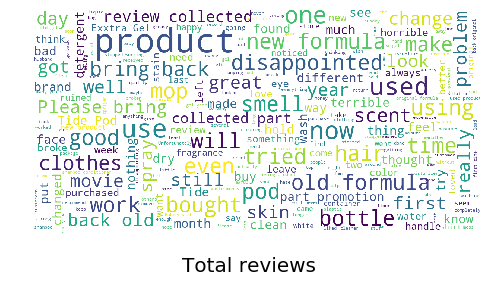

In [103]:

show_wordcloud(cluster["reviews.text"][1], title = "Total reviews")

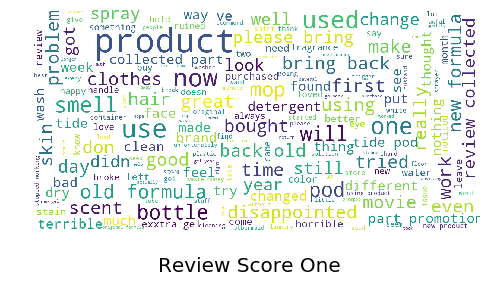

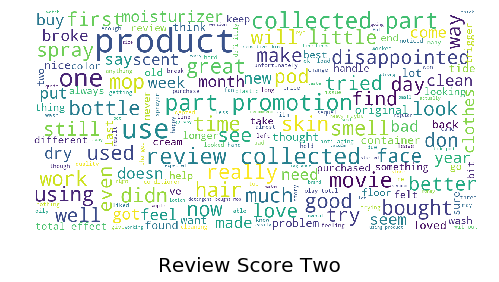

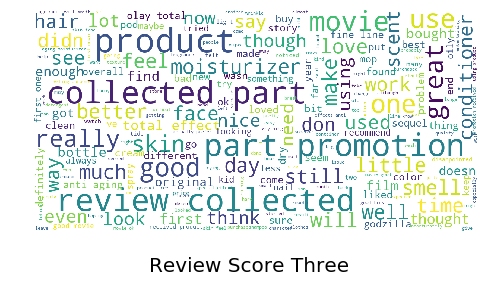

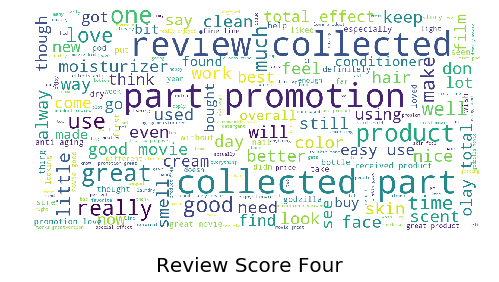

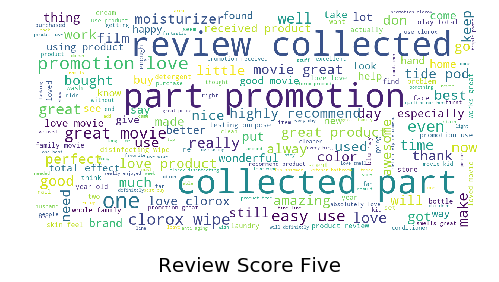

In [104]:
show_wordcloud(cluster1["reviews.textClean"][0], title = "Review Score One")
    
show_wordcloud(cluster1["reviews.textClean"][1], title = "Review Score Two")
 
show_wordcloud(cluster1["reviews.textClean"][2], title = "Review Score Three")

show_wordcloud(cluster1["reviews.textClean"][3], title = "Review Score Four")
    
show_wordcloud(cluster1["reviews.textClean"][4], title = "Review Score Five")
          

In [105]:
df7=pd.DataFrame(df6 , columns= ['reviews.rating','reviews.title', 'reviews.text'])


df7 = df7.dropna()
print(df7.head(20))
Score = df7['reviews.rating']



#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df3.groupby("reviews.rating")["reviews.text"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["reviews.textClean"] = cluster1["reviews.text"].apply(cleanReviews)



   reviews.rating                reviews.title  \
0        positive                 Just Awesome   
1        positive                         Good   
2        positive                         Good   
3        negative                 Disappointed   
4        negative                   Irritation   
5        negative                 Not worth it   
6        negative                Disappointing   
7        negative             Not happy at all   
8        negative           Very disappointing   
9        negative                    Don't buy   
10       negative          pretty dissapoitned   
11       negative               Waste of Money   
12       negative               waste of money   
13       negative  Not happy with this product   
14       negative                 Disappointed   
15       negative          Not what I expected   
16       negative        Was so disappointed!!   
17       negative           very disappointed!   
20       positive                  We love it!   


In [106]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    

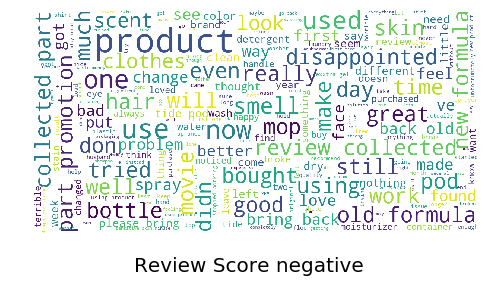

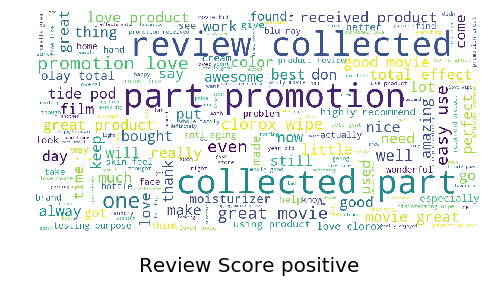

In [107]:
    
show_wordcloud(cluster1["reviews.textClean"][0], title = "Review Score negative")
    
show_wordcloud(cluster1["reviews.textClean"][1], title = "Review Score positive")